# Tutorial: Tree-based and ensemble models in Python (ANSWERS)

This is not a standalone tutorial, as most of the theory and important questions are asked in the main tutorial in R. The second tutorial serves the purpose of helping you make your own tree-based and enseble models in Python.  I expect that you have already covered the video lectures and the main tutorial in R by now. So I assume that you already know what you are doing, you just don't know how to code it in Python yet. If R tutorial provides more assistance in digesting the material, this tutorial in Python pushes you to be more independent, with minimum hints. (I used these notebooks to prepare this tutorial: [1](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb), [2](https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb) [3](https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%208.ipynb#8.3.4-Boosting))

We keep on working with the same COMPAS dataset, and we will use `sklearn` library. 

In [189]:
# Import the usual libraries
import sys
import sklearn
import numpy as np
import pandas as pd
import os

## Load data and split it in train and test sets
Let's load the sample of COMPAS data we used in the previous tutorial. For your convenience, I already transformed all factor variables into dummy variables using `model.matrix()` function in R and saved it on github as a csv file. So you can directly access the data using the link below.

In [190]:
data_location = "https://raw.githubusercontent.com/madina-k/DSE2021_tutorials/main/tutorial_trees/data/compas_sample500matrix.csv"
data = pd.read_csv(data_location)
data.head()

,Two_yr_Recidivismyes,Number_of_Priors,Age_Above_FourtyFiveyes,Age_Below_TwentyFiveyes,FemaleMale,Misdemeanoryes,ethnicityCaucasian
0,1,-0.012530,0,1,0,1,1
1,1,-0.400115,0,1,1,1,0
2,1,0.701857,1,0,1,1,0
3,0,-0.930922,0,0,1,0,1
4,1,-0.545324,0,1,1,1,0


Use `train_test_split` command from `sklearn.model_selection` to split the data into four objects: `X_train, X_test, y_train, y_test` 

In [191]:
from sklearn.model_selection import train_test_split


y = data.pop('Two_yr_Recidivismyes').values
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Decision Tree

Train a decision tree using `DecisionTreeClassifier` class from `sklearn.tree`. Look at the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and fit a decision tree using Gini node impurity measure, with minimum 25 observations in each leaf, and the maximum tree depth of 3. 

In [192]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(min_samples_leaf = 25, max_depth=4)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

And visualize the resulting tree using `plot_tree` from `sklearn.tree`.  See documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Don't forget to tell the names of the features and class names, set the font size to 14.

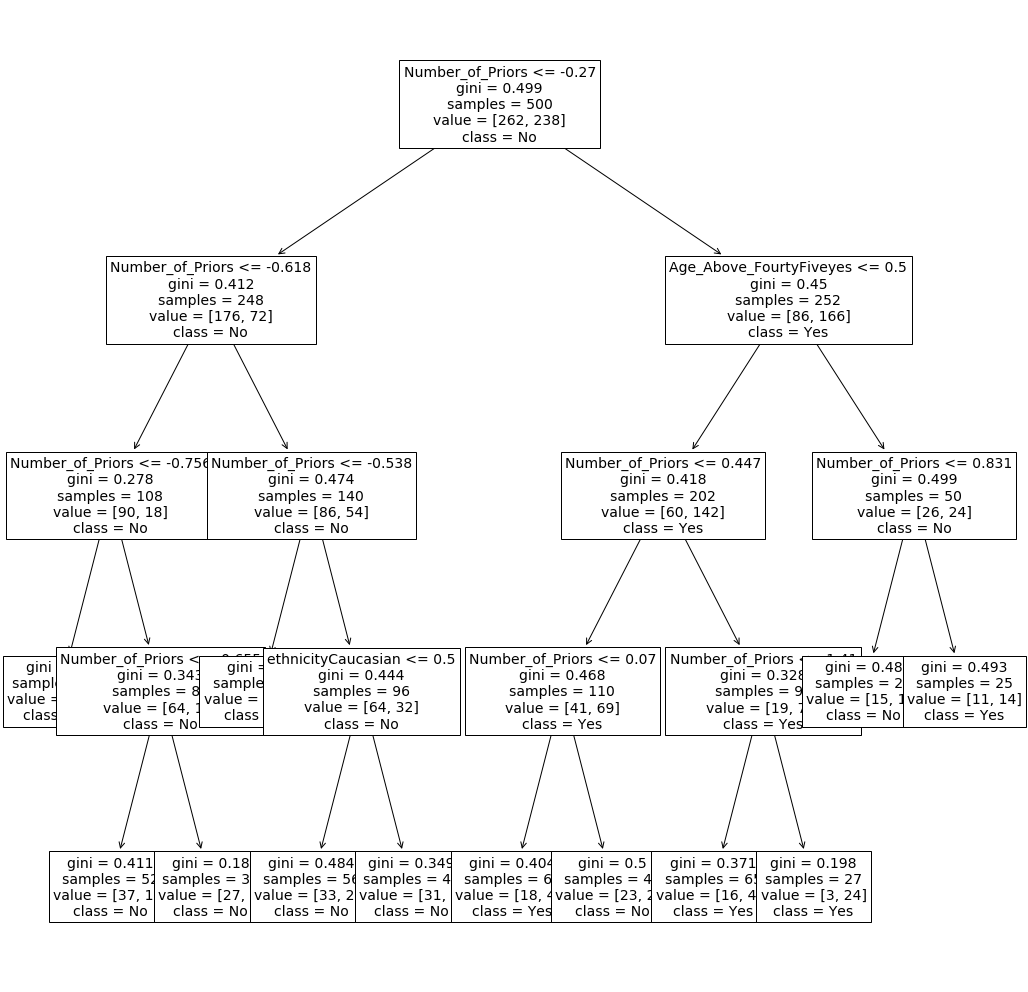

In [193]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18))  # set plot size (denoted in inches)
plot_tree(tree_clf, feature_names=X.columns, class_names=['No', 'Yes'],fontsize=14 )
plt.show()

This is some bushy tree but we do not have a way to prune it in an automated way with sklearn. If you really want to prune this tree, look how it can be done in this [blog](https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/).

Finally, let's check it's out-of-sample accuracy with `accuracy_score` function from `sklearn.metrics`. Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [194]:
from sklearn.metrics import accuracy_score

y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.728


## Bagging

Now it's time for some bagging! Use `BaggingClassifier` from `sklearn.ensemble`. See documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).
Create a new tree object which allows to grow a tree of maximum depth of 2 and put that classifier inside the `BaggingClassifier`. Ask to bag over 500 trees with maximum samples of 100 observations with bootstrapping.  Print the accuracy score.


In [195]:
from sklearn.ensemble import BaggingClassifier

tree_clf_forbagging = DecisionTreeClassifier(max_depth=2)

bag_clf = BaggingClassifier(
    tree_clf_forbagging, n_estimators=500,
    max_samples=100, bootstrap=True)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_bag))

0.72


## Random Forest

Now, let's use `RandomForestClassifier` from `sklearn.ensemble`. See documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Create a random forest of 500 trees, where each tree has a maximum depth of 2. Print the accuracy score for the test sample.

In [196]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=2)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.696


Check for the importance of each feature, using `feature_importances_` property of the classifier. (For example, see this [page](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html))

In [197]:
for name, score in zip(list(data.columns), rnd_clf.feature_importances_):
    print(name,score)

Number_of_Priors 0.5951675288832771
Age_Above_FourtyFiveyes 0.15327959016558776
Age_Below_TwentyFiveyes 0.04963856624481278
FemaleMale 0.06136793924146804
Misdemeanoryes 0.07341448602922451
ethnicityCaucasian 0.06713188943562985


## Boosting with Gradient Boosting

There are several different ways to boost trees (e.g., XGBoost library or AdaBoostClaasifier from sklearn). In this tutorial, I would ask you to train a `GradientBoostingClassifier` from `sklearn.ensemble`. See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). Make 300 trees with the maximum depth of 2. Set learning rate at 0.01. 

Then use the `staged_predict` method to predict the target variable at each stage of boosting (1 tree only, 2 trees together, 3 trees, and so on) using the test X. Get the mean squared error using the `mean_squared_error` wrapper from `sklearn.ensemble`. See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). And find the number of trees that minimize the MSE on the test sample. 



In [198]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(max_depth=2, n_estimators=300, learning_rate=0.01)
gbc_clf.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbc_clf.staged_predict(X_test)]

min_error = np.min(errors)
print(min_error)


optimal_n_trees = np.argmin(errors) + 1
print(optimal_n_trees)


0.304
26



Train the Gradient boosting classifier model with the **optimal number of trees** and and get the accuracy score.


In [199]:
gbc_best = GradientBoostingClassifier(max_depth=2, n_estimators=optimal_n_trees, learning_rate=0.01)
gbc_best.fit(X_train, y_train)



y_pred_gbcbest = gbc_best.predict(X_test)
print(accuracy_score(y_test, y_pred_gbrtbest))


0.696


## Voting classifier

Finally we will try to combine all the other models under one Ensemble model. 

Import `VotingClassifier` from `sklearn.ensemble`. 

We will also import Logistic Regression and Support Vector Machine.

In [200]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs')
svm_clf = SVC(probability=True, gamma='scale')



Now put all different classifiers to be combined within the voting classifier and compare accuracy scores across different classifiers:

In [205]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), # Logistic classifier
                  ('rf', rf_clf),  # Random forest classifier
                  ('svm', svm_clf), # SVM classifier
                  ('bag', bag_clf), # Bagging classifier
                  ('gbrt', gbc_best)],  # Boosting classifier
    voting ='hard')

for clf in (tree_clf,log_clf, rf_clf, svm_clf, bag_clf, gbc_best, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.624
LogisticRegression 0.656
RandomForestClassifier 0.696
SVC 0.688
BaggingClassifier 0.728
GradientBoostingClassifier 0.696
VotingClassifier 0.72
